# GroupBy pandas

Where to use groupby ?
When we analyzed some pandas series on the basis of some categories

In [3]:
import pandas as pd
import numpy as np

In [10]:
c = range(1,5)
c

[1, 2, 3, 4]

In [13]:
df = pd.DataFrame({'a': [1, 2, 3, 1, 2, 3], 'b': [1, 1, 1, 2, 2, 2], 'c': range(25, 31)})

In [14]:
df

,a,b,c
0,1,1,25
1,2,1,26
2,3,1,27
3,1,2,28
4,2,2,29
5,3,2,30


In [15]:
df.groupby(['a', 'b'])['c'].sum()

a  b
1  1    25
   2    28
2  1    26
   2    29
3  1    27
   2    30
Name: c, dtype: int64

In [16]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [17]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [18]:
drinks.groupby(['continent','country'])['total_litres_of_pure_alcohol'].sum()

continent      country                 
Africa         Algeria                      0.7
               Angola                       5.9
               Benin                        1.1
               Botswana                     5.4
               Burkina Faso                 4.3
               Burundi                      6.3
               Cabo Verde                   4.0
               Cameroon                     5.8
               Central African Republic     1.8
               Chad                         0.4
               Comoros                      0.1
               Congo                        1.7
               Cote d'Ivoire                4.0
               DR Congo                     2.3
               Djibouti                     1.1
               Egypt                        0.2
               Equatorial Guinea            5.8
               Eritrea                      0.5
               Ethiopia                     0.7
               Gabon                        8.9


In [24]:
drinks.beer_servings.mean()

106.16062176165804

In [25]:
# Find the mean beer serving according to continent
drinks.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [26]:
# or
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [28]:
# What is going on in groupby
# Mean of the continent Africa
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [30]:
# Simailary for continent Asia
drinks[drinks.continent == "Asia"].beer_servings.mean()

37.045454545454547

In [31]:
# Apart from mean() we have other functions also like
# Max()
drinks.groupby('continent').beer_servings.max()


continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [32]:
# Min()
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [36]:
# More robust function
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [37]:
# Whats when we do not give column name then groupby use the all the numeric column and perform the function like
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [38]:
# Want to display in Bargraph
%matplotlib inline

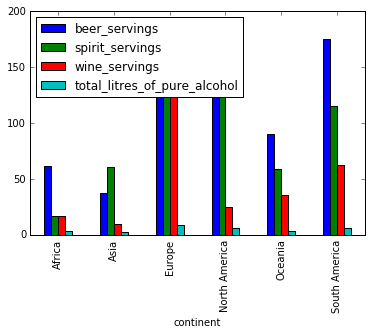

In [39]:
drinks.groupby('continent').mean().plot(kind = 'bar')

In [41]:
# What about I want to calculate the mean for two continents, for instance, Asia and Africa. How can I proceed?
drinks[(drinks.continent == 'Africa') | (drinks.continent == 'Asia')].beer_servings.mean()

50.391752577319586